# 4ERP-BI 2  / GROUPE 6 / DATA  B6
### EYA NASRI
### CHADHA MOUELHI
### AZIZ ALLOUCH
### EYA JDIR
### MARIEM KHATAT
### EMNA KTATA

# Résumé du travail

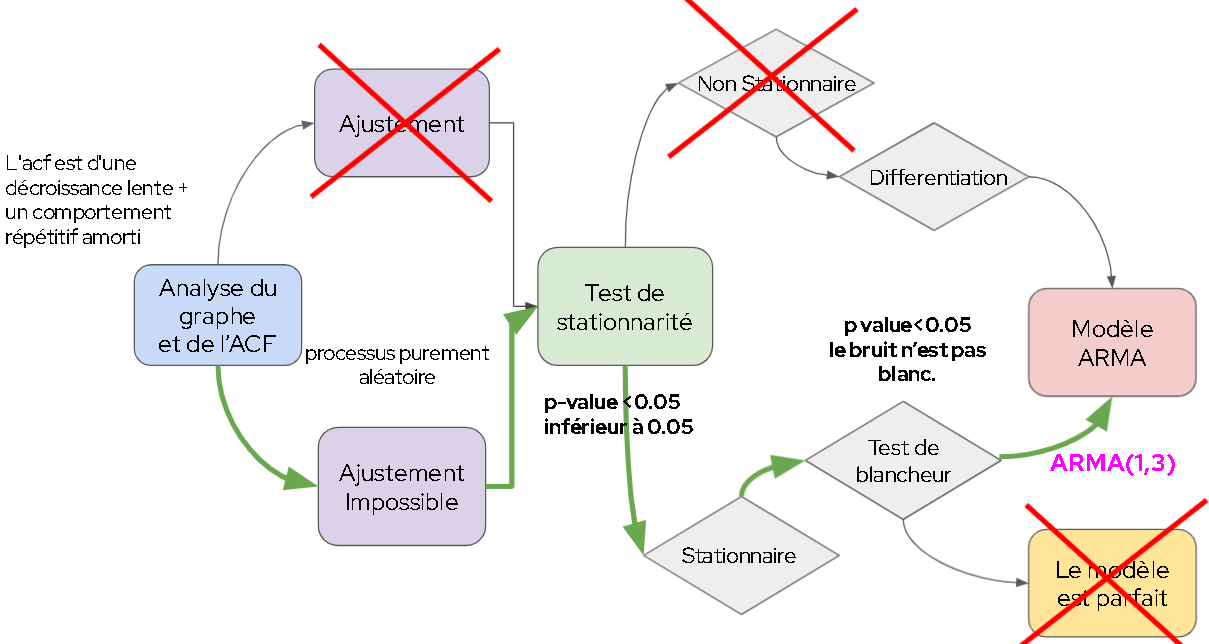

# Etude graphique des données  
On s'intéresse aux données décrivant le volume de ventes de Vehicle (TOTALNSA).
Il s'agit d'une série d'observations de fréquence mensuelle qui s'étale du mois de :Janvier 1988 au mois de Décembre 2019.

## Chargement des données

In [62]:
sp.data<-read.table("C:/Users/eyanasri/Desktop/serie tempo/B6.txt")
class(sp.data)

# les données sont de type data.frame, on les transforme sous la classe ts

[1] "data.frame"

In [63]:
# en indiquant la période de l'étude via la préision de start et freq (on peut
# aussi préciser la date de la fin : end).
sp.ts<-ts(sp.data, start = c(1988, 1),end=c(2019, 12),freq = 12)


## Exploration graphique des données

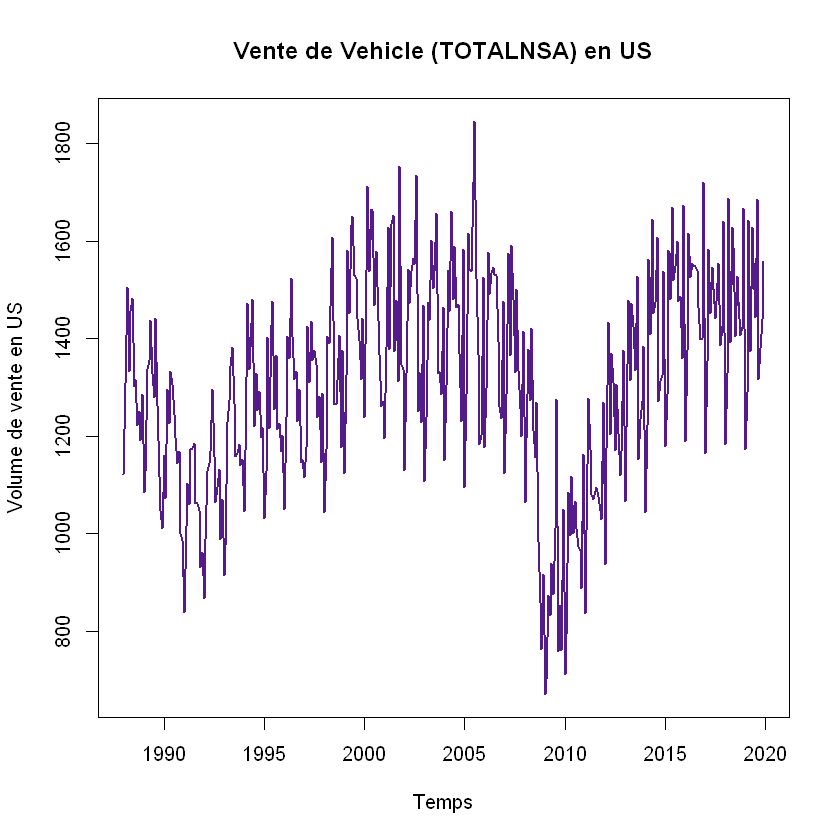

In [64]:
plot(sp.ts, xlab="Temps", ylab="Volume de vente en US",
     main="Vente de Vehicle (TOTALNSA) en US",
     col="purple4",lwd=2)

A travers la représentation graphique des données à étudier, on remarque la présence d'une tendance et d'une saisonnalité. Pour s'assurer de ce qu'on a observé, on examine la fonction d'autocorrelation `acf`.

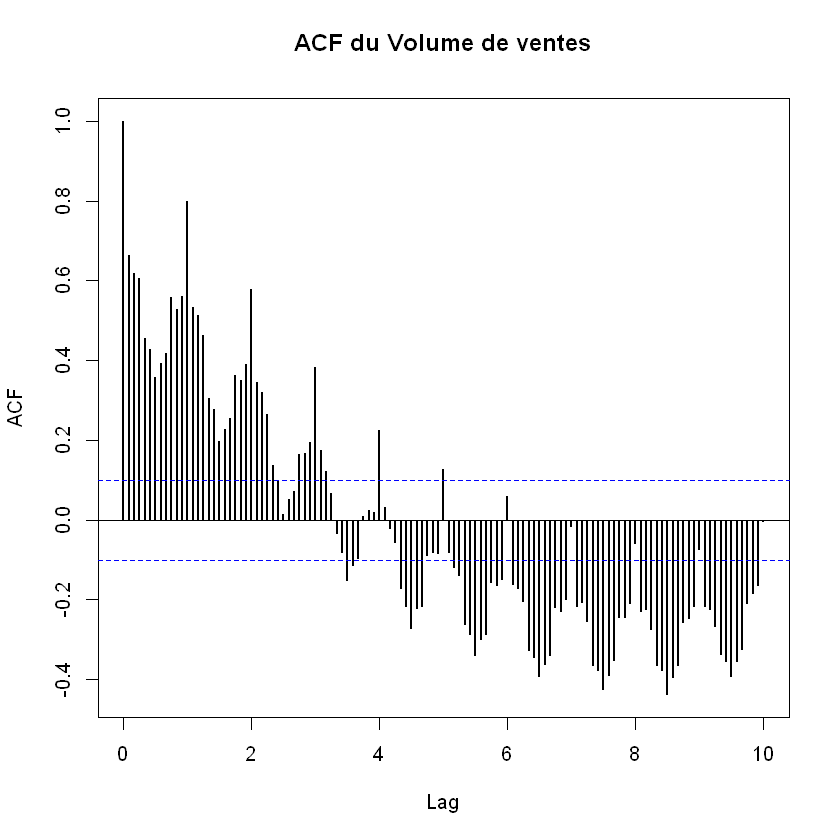

In [65]:
acf(sp.ts,lag=120,main="ACF du Volume de ventes",lwd=2)

L'acf est d'une décroissance rapide cequi confirme notre hypothèse de présence de tendance et faible mais on va le tester encore avec La sortie de la fonction `decompose` par rapport au trend (via une moyenne mobile)

# Modélisation des données  
On considère que notre ST s'écrit sous la forme suivante :  
$$y_t=f(t;\Lambda)+\varepsilon_t, \quad t\in T$$
avec :  
- $f(t;\Lambda)$ désigne la composante déterministe avec un vecteur de aparamètres $\Lambda$  
- $\varepsilon_t$ désigne la composante stochastique  

## Modélisation de la composante déterministe  
Dans cet exemple, la composante déterministe inclut la composante tendance et saisonnière.

### La composante tendance   
on va tracer le résulat de la décomposition additive 

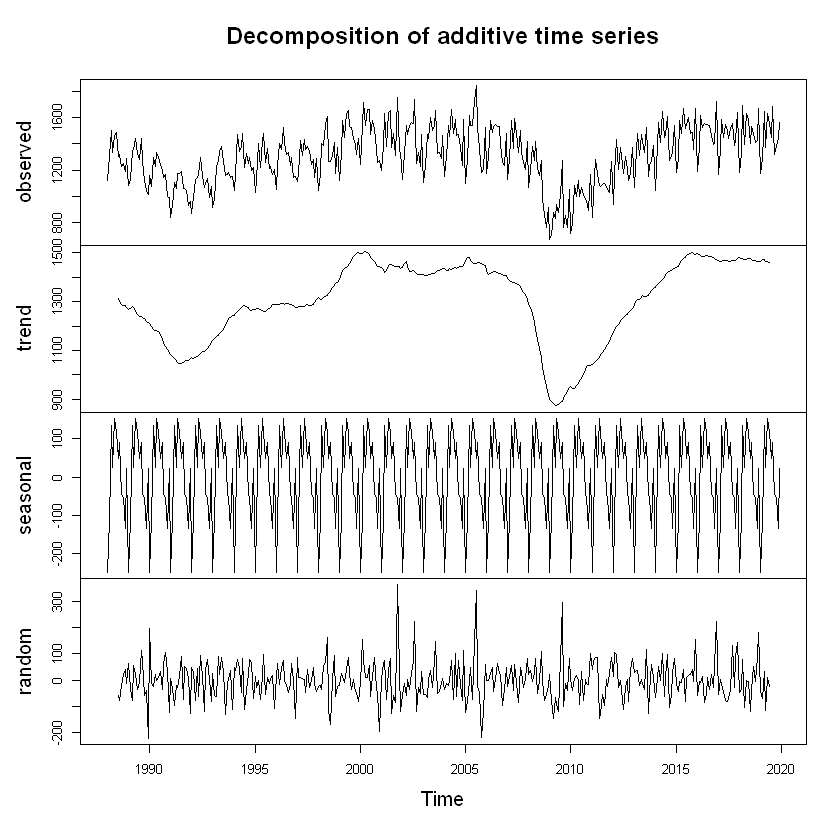

In [68]:
plot(decompose(sp.ts,type=c("additive")))

La sortie de la fonction `decompose` par rapport au trend (via une moyenne mobile) nous pousse Qu'on aller directement à la modélisation ARMA car la ST est vue en tant que processus purement aléatoire et on n'a pas pu detecter une tendance et une saisonnalité déterministes  
  


### Test de stasionnarité  
Pour pouvoir modéliser les résidus par un modèle ARMA, il faut s'assurer de leur stationnarité. Pour ce faire, on utilisera le test de Augmented Dickey Fuller `adf.test()` sous le package  `tseries`. Si :  

 1. La stationnarité est assurée alors :  
     a. Si les résidus correspondent à un bruit blanc, c'est gagné! ***Le modèle est parfait !***  
     b. Si les résidus ne coresspondent pas à un bruit blanc, on passe à la modélisation par un modèle ARMA.  
 
2. La stationnarité n'est pas assurée alors on applique des différentiations autant de fois que nécessaire pour stationnariser la série et revenir au premier point.

In [69]:
install.packages('tseries') 


  There is a binary version available but the source version is later:
         binary  source needs_compilation
tseries 0.10-48 0.10-51              TRUE

  Binaries will be installed


Warning message:
"package 'tseries' is in use and will not be installed"

In [70]:
library(tseries)
adf.test(sp.res)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -6.24  0.0100
[2,]   1 -4.16  0.0100
[3,]   2 -2.82  0.0100
[4,]   3 -2.33  0.0211
[5,]   4 -2.02  0.0435
[6,]   5 -2.12  0.0348
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -6.23  0.0100
[2,]   1 -4.16  0.0100
[3,]   2 -2.82  0.0597
[4,]   3 -2.32  0.1999
[5,]   4 -2.02  0.3194
[6,]   5 -2.12  0.2800
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -6.22   0.010
[2,]   1 -4.15   0.010
[3,]   2 -2.81   0.234
[4,]   3 -2.32   0.441
[5,]   4 -2.02   0.568
[6,]   5 -2.12   0.526
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


En comparant la p_value issue du test de Dickey-Fuller on trouve qu'elle inferieur à 0.05 donc `La stationnarité est assurée et acceptée` : l'hypothèse de stationnarité. Donc On passe a tester Si les résidus correspondent à un bruit blanc.

### Test de blancheur : `Box.test()`
On teste si la nouvelle variable `sp.res` est bien un bruit blanc ou pas. Pour ce faire, on peut procéder de deux façons différentes :  
  
1. Tracer l'acf et vérifier l'absence d'autocorrélation.  
  
2. Appliquer le test de Box-Pierce via la commande `Box.test()`.


	Box-Pierce test

data:  sp.res
X-squared = 254.17, df = 1, p-value < 2.2e-16


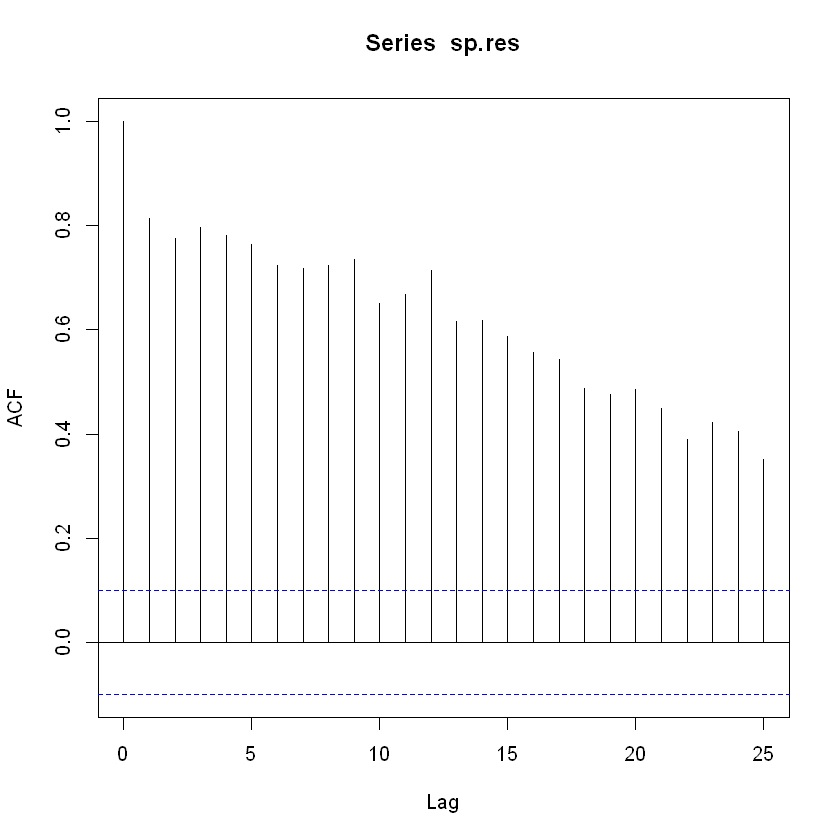

In [71]:
acf(sp.res)
Box.test(sp.res)

L'acf indique bien la présence d'autocorrélation et le test de Box-Pierce indique également à travers la valeurs de la p_value<0.05 que l'hypothèse alternative est considérée : le bruit n'est pas blanc.  
  
Il faut passer maintenant à modéliser les données stationnaires résultatntes par un modèle ARMA.  

### Modèle ARMA pour la composante résiduelle différenciée  
Pour avoir une idée sur l'ordre $p$ du modèle AR et l'ordre $q$ de celui de MA, on trace l'acf et la pacf des données résiduelles différenciées.

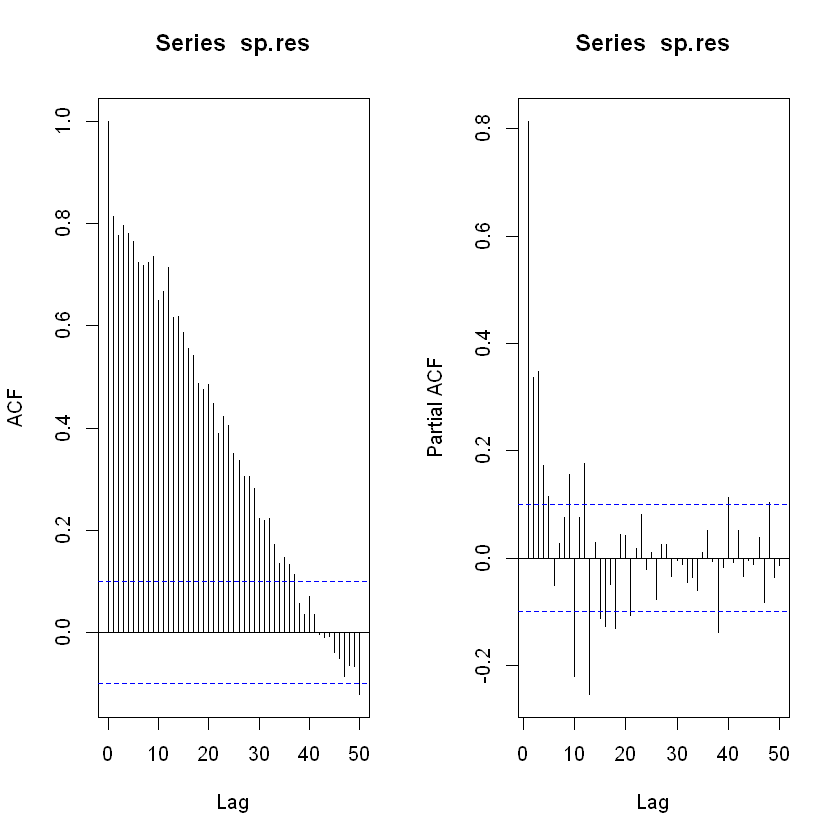

In [72]:
par(mfrow=c(1,2))
acf(sp.res,50)
pacf(sp.res,50)

On voit bien que c'est difficile de déterminer $p$ et $q$ à partir des tracés de l'acf et la pacf. On pourra utilisé la fonction `auto.arima()`du package `forecast`.

In [73]:
library(forecast)
ARMA=auto.arima(sp.res)
ARMA

Series: sp.res 
ARIMA(2,1,1) 

Coefficients:
          ar1      ar2      ma1
      -0.1328  -0.2084  -0.5235
s.e.   0.0967   0.0703   0.0922

sigma^2 estimated as 7721:  log likelihood=-2256.53
AIC=4521.06   AICc=4521.17   BIC=4536.85

Le résultat de la fonction `auto.arima()` nous donne que le bon modèle à considérer est un ARMA(1,3). Donnons ce modèle.

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -19.57    0.01
[2,]   1 -13.78    0.01
[3,]   2 -11.07    0.01
[4,]   3  -9.72    0.01
[5,]   4  -8.37    0.01
[6,]   5  -8.51    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -19.54    0.01
[2,]   1 -13.77    0.01
[3,]   2 -11.05    0.01
[4,]   3  -9.71    0.01
[5,]   4  -8.36    0.01
[6,]   5  -8.49    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -19.55    0.01
[2,]   1 -13.78    0.01
[3,]   2 -11.07    0.01
[4,]   3  -9.73    0.01
[5,]   4  -8.37    0.01
[6,]   5  -8.52    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


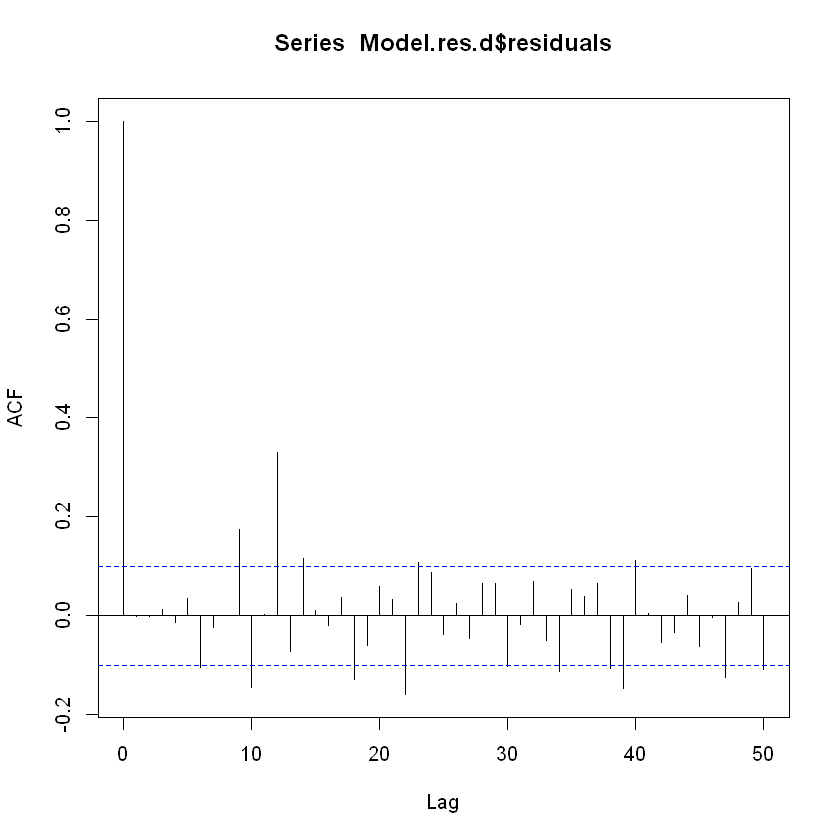

In [74]:
#arima(l.p, order = c(2:p, 1:d, 1:q),seasonal = list(order = c(2p,1,1q), period = 12))
Model.res.d<-arima(sp.res,order = c(2, 1, 1))
adf.test(Model.res.d$residuals)
acf(Model.res.d$residuals,50)

On voit que la composante aléatoire du modèle ARMA est stationnaire mais elle `n'est pas un bruit blanc`. On a une autocorrélation saisonnière. On fera appel à un modèle `SARIMA` pour tenir en considération de cette saisonnalité.

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -19.63    0.01
[2,]   1 -13.78    0.01
[3,]   2 -11.49    0.01
[4,]   3  -9.66    0.01
[5,]   4  -8.16    0.01
[6,]   5  -7.60    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -19.63    0.01
[2,]   1 -13.78    0.01
[3,]   2 -11.49    0.01
[4,]   3  -9.67    0.01
[5,]   4  -8.18    0.01
[6,]   5  -7.62    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -19.62    0.01
[2,]   1 -13.78    0.01
[3,]   2 -11.49    0.01
[4,]   3  -9.68    0.01
[5,]   4  -8.18    0.01
[6,]   5  -7.63    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


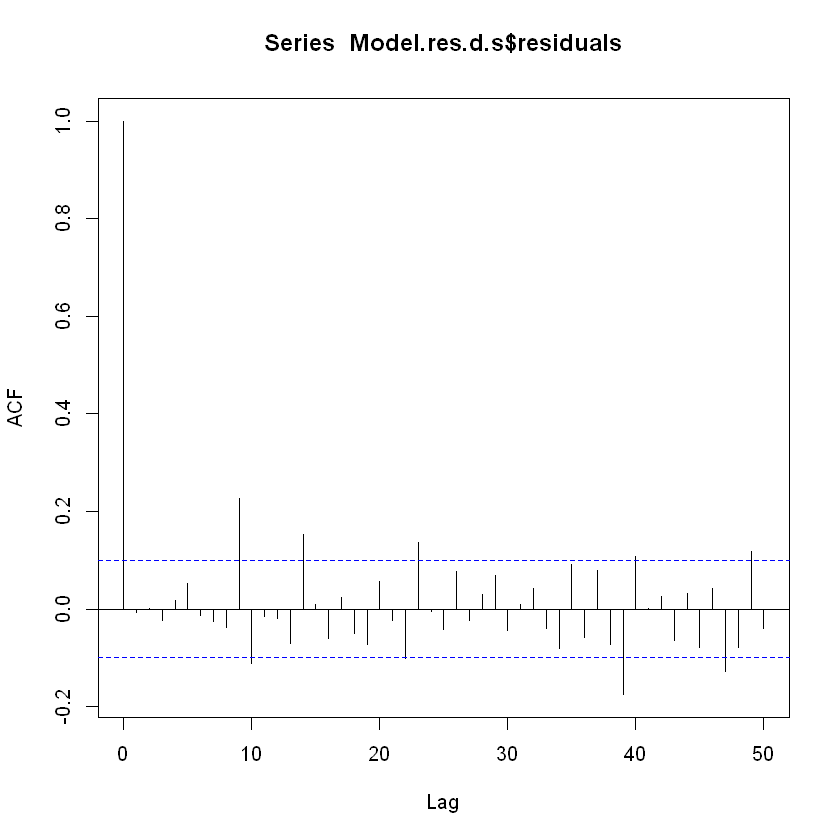

In [75]:
Model.res.d.s<-arima(sp.res, order = c(2, 1, 1),seasonal = list(order = c(2,1,1), period = 12))
adf.test(Model.res.d.s$residuals)
acf(Model.res.d.s$residuals,50)

### Pour une meilleure interprétation des résultats

Warning message:
"package 'aTSA' is in use and will not be installed"

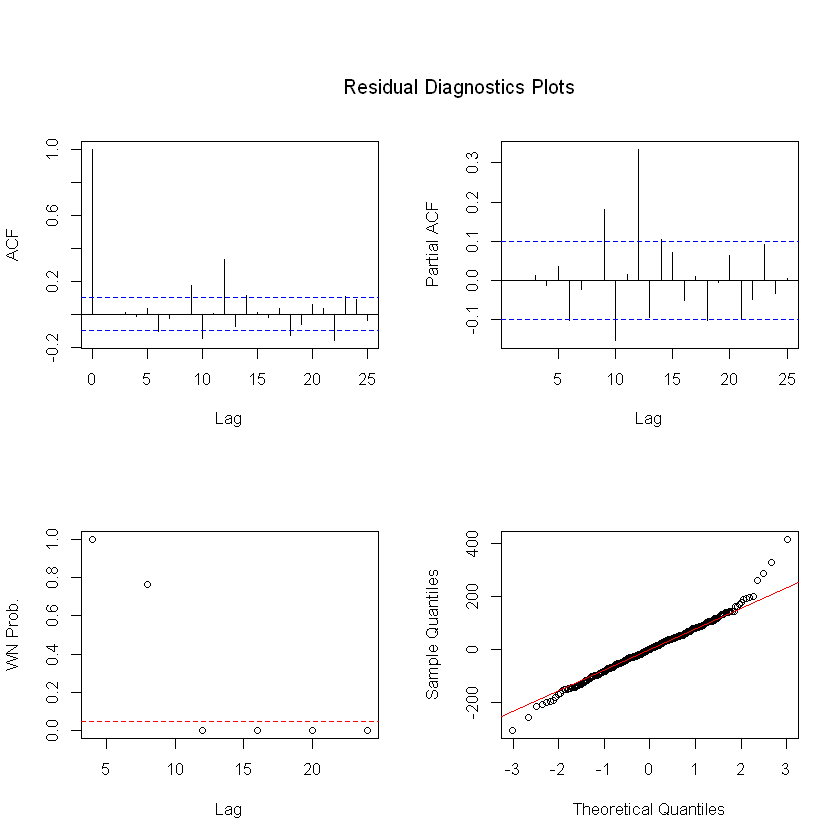

In [76]:
install.packages("aTSA")
library(aTSA)
ts.diag(Model.res.d)

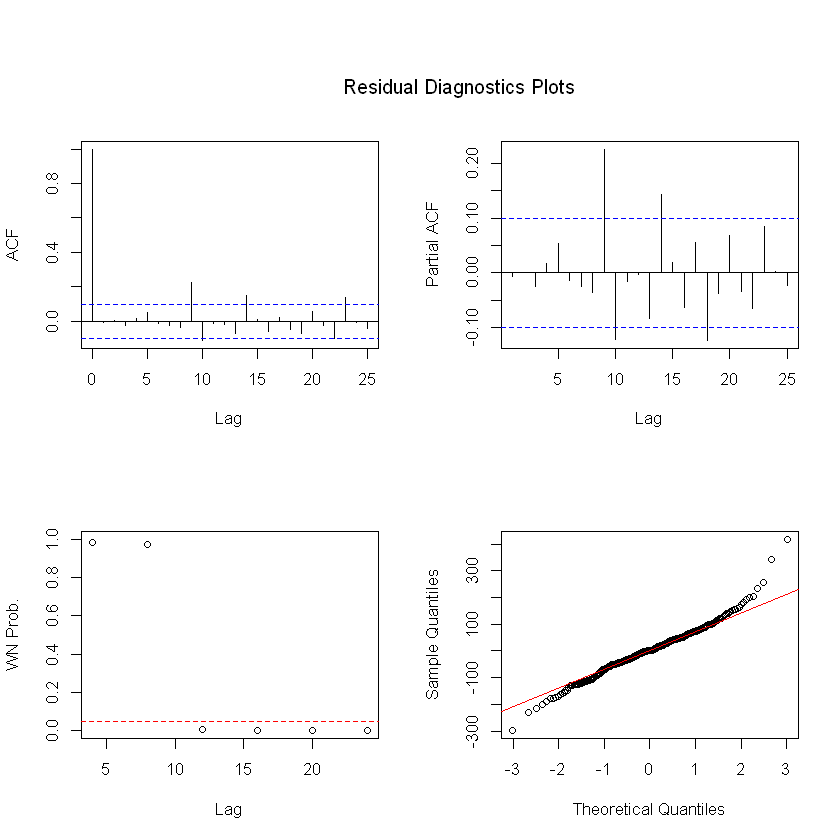

In [77]:
library(aTSA)
ts.diag(Model.res.d.s)